In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('D:\Data_sets\Data.csv')
df

,Year_Of_Experience,Salary
0,2,15
1,3,28
2,5,42
3,13,64
4,8,50
5,16,90
6,11,58
7,1,8
8,9,54
9,7,48


Text(0, 0.5, 'Salary in 1000$')

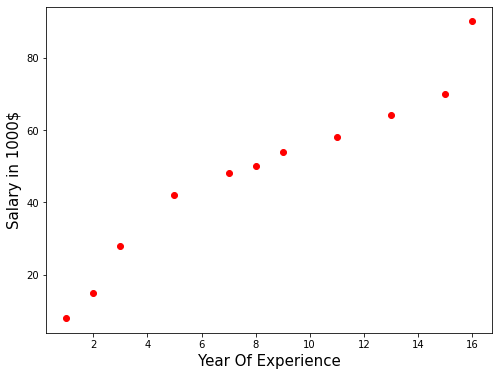

In [4]:
plt.figure(figsize = (8,6))
plt.scatter(df.Year_Of_Experience, df.Salary, color='r')
plt.xlabel("Year Of Experience",fontsize=15)
plt.ylabel("Salary in 1000$",fontsize=15)

In [5]:
year=df.loc[:,'Year_Of_Experience']
year=year.values

salary=df.loc[:,'Salary']
salary=salary.values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(year, salary, test_size=0.2)

In [6]:
print("X_train =",X_train.size)
print("Y_train =",Y_train.size)


X_train = 8
Y_train = 8


In [7]:
print("X_test =",X_test.size)
print("Y_test =",Y_test.size)

X_test = 3
Y_test = 3


In [8]:
class LinearRegression():

    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate
    
    def mean_squared_error(y_true, y_predicted):
        cost = np.sum((y_true-y_predicted)**2) / len(y_true)
        return cost

    def fit_model(self,x, y):
        current_weight = 0
        current_bias = 0
        iterations = self.iterations
        learning_rate = self.learning_rate
        n = len(x)

        costs = []
        weights = []


        for i in range(iterations):

            y_predicted = (current_weight * x) + current_bias

            current_cost = LinearRegression.mean_squared_error(y, y_predicted)

            previous_cost = current_cost

            costs.append(current_cost)
            weights.append(current_weight)

            # Calculating the gradients
            weight_gradient = -(2/n) * sum(x * (y-y_predicted))
            bias_gradient = -(2/n) * sum(y-y_predicted)

            # Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_gradient)
            current_bias = current_bias - (learning_rate * bias_gradient)


        return current_weight, current_bias
    
    
    
    def predict(self, x, w, b):
        
        ans= w * x + b
        
        return ans

Weight: 5.4504009310407735
Bias: 1.0992144714158185


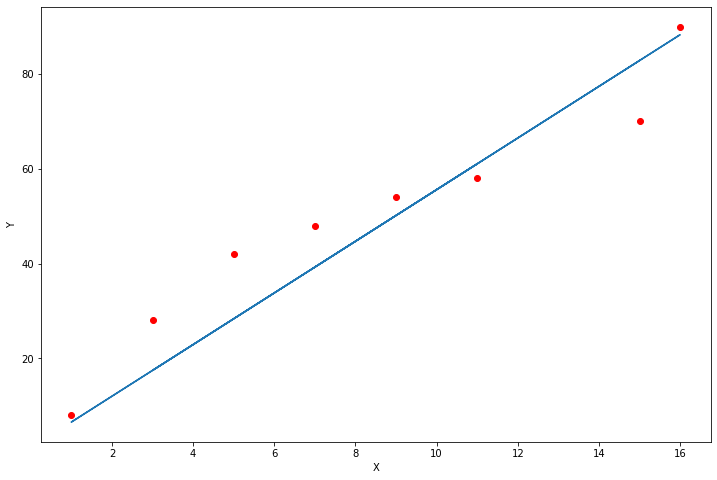

In [9]:
   
lr=LinearRegression(1000,0.0001)

weight, bias=lr.fit_model(X_train, Y_train)

print(f"Weight: {weight}\nBias: {bias}")


plt.figure(figsize = (12,8))
plt.scatter(X_train, Y_train, marker='o', color='red')


regression_line= [(weight * x ) + bias for x in X_train]
plt.plot(X_train,regression_line)


plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
X_test, Y_test

(array([ 2,  8, 13], dtype=int64), array([15, 50, 64], dtype=int64))

In [11]:
lr.predict(X_test, weight, bias)

array([12.00001633, 44.70242192, 71.95442657])

In [12]:
Y_test

array([15, 50, 64], dtype=int64)

### R-squared

In [13]:
y_pred = lr.predict(X_test, weight, bias)

In [14]:
SSres = np.sum(np.square(Y_test-y_pred))

In [15]:
Y_mean=np.mean(Y_train)
SStot = np.sum(np.square(Y_train-Y_mean))

In [16]:
R_squared = 1 - SSres/SStot

In [17]:
R_squared

0.9771727590372159